## statistical analysis of the MC results

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

from scipy.special import erfinv
from scipy import stats


In [2]:
#nsamp = 10000
#nbins = 100
#nev   = 6000
#mu    = 0.0
#
#print(str(mu))
#
#name = 'ToyMC_BatchMu_IsoTrk__nsamples_'+str(nsamp)+'__nbins_'+str(nbins)+'__nev_'+str(nev)+'__mu_'+str(mu)+'.txt'
#
#print(name)
#
#data = np.loadtxt("IsoTrk/"+name)
#print(data)

In [3]:
nsamp = 100000
nbins = 40
nev   = 6000
mus = [5.0*x for x in range(0,101)]

data_AllMu = []

for mu in mus:
    fname = 'ToyMC_BatchMu_IsoTrk__nsamples_'+str(nsamp)+'__nbins_'+str(nbins)+'__nev_'+str(nev)+'__mu_'+str(mu)+'.txt'
    data_AllMu.append(np.loadtxt("ToyMC_BatchMu_IsoTrk__nsamples_100000__nbins_40__nev_6000/"+fname))

data_AllMu = np.array(data_AllMu)
print(data_AllMu)

[[23.8888 37.2704 35.0017 ... 44.466  47.1462 53.8137]
 [23.8888 37.0045 34.4699 ... 31.0527 29.2167 51.2917]
 [23.779  35.8553 37.8583 ... 21.2354 32.7403 32.3468]
 ...
 [69.2126 51.4892 89.1101 ... 85.0386 53.2061 76.9123]
 [70.3848 43.6385 96.33   ... 76.6213 72.6195 83.9399]
 [72.6896 53.6472 90.024  ... 69.6535 82.5614 95.2362]]


(array([3.9100e+02, 7.9110e+03, 2.7943e+04, 3.4250e+04, 2.0104e+04,
        7.3050e+03, 1.7460e+03, 3.0500e+02, 4.0000e+01, 5.0000e+00]),
 array([11.4147, 19.4263, 27.4379, 35.4495, 43.4611, 51.4727, 59.4843,
        67.4959, 75.5075, 83.5191, 91.5307]),
 <a list of 10 Patch objects>)

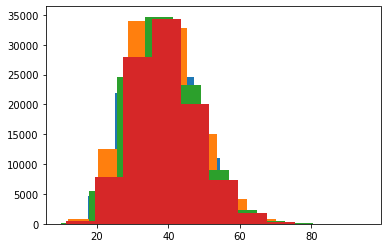

In [4]:
plt.hist(data_AllMu[0])
plt.hist(data_AllMu[5])
plt.hist(data_AllMu[10])
plt.hist(data_AllMu[15])


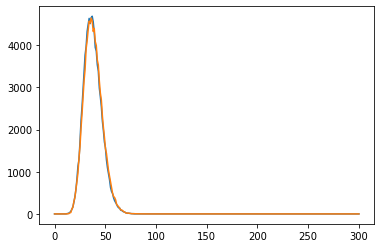

In [5]:
h0, e0 = np.histogram(data_AllMu[0], bins=300, range=(0,300))
h1, e1 = np.histogram(data_AllMu[10], bins=300, range=(0,300))

plt.plot(np.linspace(0,300, 300), h0)
plt.plot(np.linspace(0,300, 300), h1)

## questo test non va un granchè nel nostro caso

In [6]:
from scipy import stats

stats.ks_2samp(h0,h1)

Ks_2sampResult(statistic=0.016666666666666666, pvalue=0.9999999999989688)

Ks_2sampResult(statistic=0.005849999999999994, pvalue=0.06527555968059935)

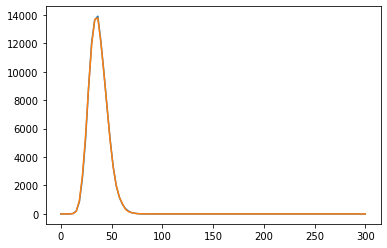

In [7]:
nb = 100
mu_index = 10

h0, e0 = np.histogram(data_AllMu[0], bins=nb, range=(0,300))
h1, e1 = np.histogram(data_AllMu[1], bins=nb, range=(0,300))

plt.plot(np.linspace(0,300, nb), h0)
plt.plot(np.linspace(0,300, nb), h1)

stats.ks_2samp(data_AllMu[0],data_AllMu[1])

## provo con la kullback-leibler

non penso vada bene perchè nella zona q=0 abbiamo divegenze, il che ha senso perchè la distanza delle distribuzioni è minore della dKb ma non ci aiuta

In [8]:
def KB_dist(P, Q):
    if(len(P)!=len(Q)): return -1
    return np.sum(P*np.log(P/Q) )

def Total_var_dist (D_kb):
    return math.sqrt(0.5*D_kb)

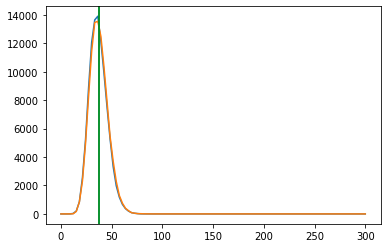

In [9]:
nb = 100
mId = 10

h0, e0 = np.histogram(data_AllMu[0]  , bins=nb, range=(0,300))
h1, e1 = np.histogram(data_AllMu[mId], bins=nb, range=(0,300))

plt.plot(np.linspace(0,300, nb), h0)
plt.plot(np.linspace(0,300, nb), h1)
plt.axvline(np.median(data_AllMu[0]) , c='c')
plt.axvline(np.median(data_AllMu[mId]), c='g' )



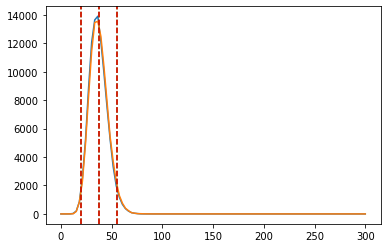

In [10]:
med0 = np.median(data_AllMu[0])
med1 = np.median(data_AllMu[mId])

sig0 = math.sqrt(np.var(data_AllMu[0]))
sig1 = math.sqrt(np.var(data_AllMu[mId]))


plt.plot(np.linspace(0,300, nb), h0)
plt.plot(np.linspace(0,300, nb), h1)
plt.axvline(med0, c='g', ls='--')
plt.axvline(med1, c='r', ls='--')
plt.axvline(med0+2*sig0, c='g', ls='--')
plt.axvline(med0-2*sig0, c='g', ls='--')
plt.axvline(med1+2*sig1, c='r', ls='--')
plt.axvline(med1-2*sig1, c='r', ls='--')


In [35]:
def plot_hists(nb, idx, upper=300):
    h0, e0 = np.histogram(data_AllMu[0]  , bins=nb, range=(0,upper))
    h1, e1 = np.histogram(data_AllMu[idx], bins=nb, range=(0,upper))
    med0 = np.median(data_AllMu[0])
    med1 = np.median(data_AllMu[idx])
    sig0 = math.sqrt(np.var(data_AllMu[0]))
    sig1 = math.sqrt(np.var(data_AllMu[idx]))
    
    plt.plot(np.linspace(0,upper, nb), h0)
    plt.plot(np.linspace(0,upper, nb), h1)
    plt.axvline(med0, c='g', ls='--')
    plt.axvline(med1, c='r', ls='--')
    plt.axvline(med0+2*sig0, c='g', ls='--')
    plt.axvline(med0-2*sig0, c='g', ls='--')
    plt.axvline(med1+2*sig1, c='r', ls='--')
    plt.axvline(med1-2*sig1, c='r', ls='--')
    
def sub_plot_hists(ax, nb, idx, upper=300):
    h0, e0 = np.histogram(data_AllMu[0]  , bins=nb, range=(0,upper))
    h1, e1 = np.histogram(data_AllMu[idx], bins=nb, range=(0,upper))
    med0 = np.median(data_AllMu[0])
    med1 = np.median(data_AllMu[idx])
    sig0 = math.sqrt(np.var(data_AllMu[0]))
    sig1 = math.sqrt(np.var(data_AllMu[idx]))
    
    dist = med1-med0
    sig = math.sqrt(sig0**2+sig1**2)
    
    #pObs = np.sum(h0[h0<med1])/np.sum(h0)
    
    #pObs = np.sum(h0[np.linspace(0,upper, nb)>med1])/np.sum(h0)
    pObs = 1-stats.chi2.cdf(med1, 38)
    #print(pObs, 1-stats.chi2.cdf(med1, 38))
    
    #sigObs = math.sqrt(2)/math.erf(1-pObs)
    sigObs = math.sqrt(2)*erfinv(1-pObs)
    print(math.sqrt(2)*erfinv(1-pObs), "  vs  ", math.sqrt(2)*erfinv(1-(pObs)/2))
    
    ax.plot(np.linspace(0,upper, nb), h0)
    ax.plot(np.linspace(0,upper, nb), h1)
    ax.axvline(med0, c='g', ls='--')
    ax.axvline(med1, c='r', ls='--')
    ax.axvline(med0+2*sig0, c='g', ls='--')
    ax.axvline(med0-2*sig0, c='g', ls='--')
    ax.axvline(med1+2*sig1, c='r', ls='--')
    ax.axvline(med1-2*sig1, c='r', ls='--')
    ax.set_title("Distribution for $\mu=$"+str(mus[idx]))
    ax.set_xlabel("q($\mu$)")
    ax.text(0.85,0.6, "    Med    $\sigma$\n $H_{0}$   "+str(round(med0,1))+"  "+str(round(sig0,1))+"\n$H_{1}$   "+
                        str(round(med1,1))+"  "+str(round(sig1,1))+ "\n Dist: "+str(round(dist,2))+"\n $\sigma_{TOT}$= "+str(round(sig,2))+
                        "\nCL= "+str(round(dist/sig,2))+"$\sigma$"+ "\n$p_{obs}$= "+str(round(pObs,2))+
                        "\n$\sigma_{obs}$= "+str(round(sigObs,3)), size=12, ha="center", 
                 transform=ax.transAxes)
    
def significance( nb, idx, upper=300):
    h1, e1 = np.histogram(data_AllMu[idx], bins=nb, range=(0,upper))
    med1 = np.median(data_AllMu[idx])
    pObs = 1-stats.chi2.cdf(med1, 38)
    sigObs = math.sqrt(2)*erfinv(1-pObs)
    #print(math.sqrt(2)*erfinv(1-pObs), "  vs  ", math.sqrt(2)*erfinv(1-(pObs)/2))
    return sigObs

In [1]:
nr = 2
nc = 2
fig, axs = plt.subplots(nr, nc, figsize=(8*nc, 6*nr))
for i in range(0,nr):
    for j in range(0,nc):
        sub_plot_hists(axs[i,j], 200, 6*(j+nc*i))


NameError: name 'plt' is not defined

In [14]:



mus = [5.0*x for x in range(0,101)]

In [19]:
h_mu= []
for i in range (0, nsamp):
    h_mu.append(mus)
h_mu= np.array(h_mu).T

In [20]:
print(h_mu)

[[  0.   0.   0. ...   0.   0.   0.]
 [  5.   5.   5. ...   5.   5.   5.]
 [ 10.  10.  10. ...  10.  10.  10.]
 ...
 [490. 490. 490. ... 490. 490. 490.]
 [495. 495. 495. ... 495. 495. 495.]
 [500. 500. 500. ... 500. 500. 500.]]


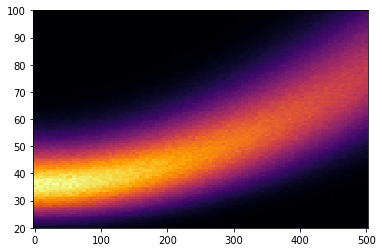

In [30]:
plt.hist2d(h_mu.flatten(), data_AllMu.flatten(),  range=[[-2.5, 502.5], [20, 100]], bins=[101, 120], cmap='inferno')
plt.show()

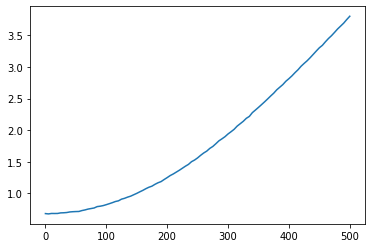

In [40]:
sigs=[]
for i in np.linspace(0,100,101, dtype=np.int):
    sigs.append(significance(200, i))


plt.plot(5*np.linspace(0,100, 101),sigs)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100])